In [220]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.core import datetools
import datetime
from datetime import datetime as dt
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


### Steps
  - Data Analysis
##### Algorithm implemented :
   - Cluster based anomaly detection (K-mean)
   - Isolation Forest
   - One class SVM
 

    

In [268]:
df = pd.read_csv('ApartmentData_March2019.csv')
df.describe()

,value
count,60533.000000
mean,39.094240
std,92.220749
min,0.000000
25%,8.000000
50%,36.900000
75%,43.400000
max,1945.900000


### Date time Hours conversion

In [222]:
df['timeOfData'] = pd.to_datetime(df['timeOfData'])
df['hours'] = df['timeOfData'].dt.hour

df['date']=df['timeOfData'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['time']=df['timeOfData'].dt.time



df['weekday'] = df['date'].dt.weekday


In [223]:
df

,_id,function_name,function_type_name,id,timeOfData,value,hours,date,time,weekday
0,5c786dd3433f9a7b6e7f9f87,TV Lounge Power,power,11202/5/power,2019-03-01 00:06:22,0.4,0,2019-03-01,00:06:22,4
1,5c786dd3433f9a7b6e7f9f88,Bed Lamp Power,power,11202/3/power,2019-03-01 00:15:07,0.0,0,2019-03-01,00:15:07,4
2,5c786dd3433f9a7b6e7f9f8a,Hot Water Kettle Kitchen Power,power,11202/4/power,2019-03-01 00:16:26,0.0,0,2019-03-01,00:16:26,4
3,5c787be2433f9a7b6e7fa511,Bathroom Illuminance,illuminance,11202/12/illuminance,2019-03-01 00:30:07,0.0,0,2019-03-01,00:30:07,4
4,5c787be2433f9a7b6e7fa513,Bedroom Illuminance,illuminance,11202/11/illuminance,2019-03-01 00:32:02,0.0,0,2019-03-01,00:32:02,4
5,5c787be2433f9a7b6e7fa512,Lounge Illuminance,illuminance,11202/13/illuminance,2019-03-01 00:32:22,0.0,0,2019-03-01,00:32:22,4
6,5c787be2433f9a7b6e7fa515,Kitchen Illuminance,illuminance,11202/9/illuminance,2019-03-01 00:46:03,0.0,0,2019-03-01,00:46:03,4
7,5c787be2433f9a7b6e7fa514,TV Lounge Power,power,11202/5/power,2019-03-01 01:06:22,0.4,1,2019-03-01,01:06:22,4
8,5c787be2433f9a7b6e7fa516,Bed Lamp Power,power,11202/3/power,2019-03-01 01:15:07,0.0,1,2019-03-01,01:15:07,4
9,5c787be2433f9a7b6e7fa517,Hot Water Kettle Kitchen Power,power,11202/4/power,2019-03-01 01:16:26,0.0,1,2019-03-01,01:16:26,4


### Weekday count base graph on power

In [224]:
week0=df[df['weekday']==0]
week1=df[df['weekday']==1]
week2=df[df['weekday']==2]
week3=df[df['weekday']==3]
week4=df[df['weekday']==4]
week5=df[df['weekday']==5]
week6=df[df['weekday']==6]

### string extract 

In [225]:
power0=week0[week0['function_name'].str.contains("Power")]
power1=week1[week1['function_name'].str.contains("Power")]
power2=week2[week2['function_name'].str.contains("Power")]
power3=week3[week3['function_name'].str.contains("Power")]
power4=week4[week4['function_name'].str.contains("Power")]
power5=week5[week5['function_name'].str.contains("Power")]
power6=week6[week6['function_name'].str.contains("Power")]

### Aggrigate

In [226]:
power_week0=power0.set_index('date').groupby('function_name')["value"].resample("D").count() 
power_week1=power1.set_index('date').groupby('function_name')["value"].resample("D").count()
power_week2=power2.set_index('date').groupby('function_name')["value"].resample("D").count()
power_week3=power3.set_index('date').groupby('function_name')["value"].resample("D").count()
power_week4=power4.set_index('date').groupby('function_name')["value"].resample("D").count()
power_week5=power5.set_index('date').groupby('function_name')["value"].resample("D").count()
power_week6=power6.set_index('date').groupby('function_name')["value"].resample("D").count()

### Header set

In [227]:
power_week0.to_csv('jram.csv')
col_Names0=["function_name", "timeOfData", "count"]
csv= pd.read_csv("jram.csv",names=col_Names0)
df41=csv.drop(csv.index[0])


power_week1.to_csv('nram.csv')
col_Names1=["function_name", "timeOfData", "count"]
csv1= pd.read_csv("nram.csv",names=col_Names1)
df42=csv1.drop(csv1.index[0])

power_week2.to_csv('mram.csv')
col_Names2=["function_name", "timeOfData", "count"]
csv2= pd.read_csv("mram.csv",names=col_Names2)
df43=csv2.drop(csv2.index[0])

power_week3.to_csv('oram.csv')
col_Names3=["function_name", "timeOfData", "count"]
csv3= pd.read_csv("oram.csv",names=col_Names3)
df44=csv3.drop(csv3.index[0])


power_week4.to_csv('pram.csv')
col_Names4=["function_name", "timeOfData", "count"]
csv4= pd.read_csv("pram.csv",names=col_Names4)
df45=csv4.drop(csv4.index[0])

power_week5.to_csv('qram.csv')
col_Names5=["function_name", "timeOfData", "count"]
csv5= pd.read_csv("qram.csv",names=col_Names4)
df46=csv5.drop(csv5.index[0])

power_week6.to_csv('rram.csv')
col_Names6=["function_name", "timeOfData", "count"]
csv6= pd.read_csv("rram.csv",names=col_Names6)
df47=csv6.drop(csv6.index[0])




In [228]:

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(15.5, 8.5)
# plt.plot(df41['function_name'], df41['count'])

# plt.xticks(rotation='vertical')
# plt.show()




### Door Sensor week

In [229]:
weekd_door0=df[df['weekday']==0]
weekd_door1=df[df['weekday']==1]
weekd_door2=df[df['weekday']==2]
weekd_door3=df[df['weekday']==3]
weekd_door4=df[df['weekday']==4]
weekd_door5=df[df['weekday']==5]
weekd_door6=df[df['weekday']==6]

In [230]:
door0=weekd_door0[weekd_door0['function_name'].str.contains("Door")]
door1=weekd_door1[weekd_door1['function_name'].str.contains("Door")]
door2=weekd_door2[weekd_door2['function_name'].str.contains("Door")]
door3=weekd_door3[weekd_door3['function_name'].str.contains("Door")]
door4=weekd_door4[weekd_door4['function_name'].str.contains("Door")]
door5=weekd_door5[weekd_door5['function_name'].str.contains("Door")]
door6=weekd_door6[weekd_door6['function_name'].str.contains("Door")]

In [247]:
door0

,_id,function_name,function_type_name,id,timeOfData,value,hours,date,time,weekday
7812,5c7ce78c433f9a7b6e81defb,Entry Door,door,11202/10/alarm_door,2019-03-04 09:00:45,255.0,9,2019-03-04,09:00:45,0
7813,5c7ce78c433f9a7b6e81def9,Entry Door,door,11202/10/alarm_door,2019-03-04 09:00:51,0.0,9,2019-03-04,09:00:51,0
7829,5c7cf6b9433f9a7b6e81e2ef,Entry Door,door,11202/10/alarm_door,2019-03-04 10:04:28,255.0,10,2019-03-04,10:04:28,0
7831,5c7cf6b9433f9a7b6e81e2f6,Entry Door,door,11202/10/alarm_door,2019-03-04 10:04:52,0.0,10,2019-03-04,10:04:52,0
23228,5c85f432433f9a7b6e85340b,Bathroom Door,door,11202/14/alarm_door,2019-03-11 05:48:24,255.0,5,2019-03-11,05:48:24,0
23283,5c861586433f9a7b6e853ccc,Bathroom Door,door,11202/14/alarm_door,2019-03-11 07:40:12,0.0,7,2019-03-11,07:40:12,0
23294,5c861586433f9a7b6e853cd7,Bathroom Door,door,11202/14/alarm_door,2019-03-11 07:55:26,255.0,7,2019-03-11,07:55:26,0
23459,5c8628b0433f9a7b6e854450,Entry Door,door,11202/10/alarm_door,2019-03-11 09:26:39,255.0,9,2019-03-11,09:26:39,0
23460,5c8628b0433f9a7b6e854456,Entry Door,door,11202/10/alarm_door,2019-03-11 09:26:54,0.0,9,2019-03-11,09:26:54,0
23510,5c863a4b433f9a7b6e854a25,Entry Door,door,11202/10/alarm_door,2019-03-11 10:44:28,255.0,10,2019-03-11,10:44:28,0


In [231]:
door_week0=door0.set_index('date').groupby('function_name')["value"].resample("D").count() 
door_week1=door1.set_index('date').groupby('function_name')["value"].resample("D").count()
door_week2=door2.set_index('date').groupby('function_name')["value"].resample("D").count()
door_week3=door3.set_index('date').groupby('function_name')["value"].resample("D").count()
door_week4=door4.set_index('date').groupby('function_name')["value"].resample("D").count()
door_week5=door5.set_index('date').groupby('function_name')["value"].resample("D").count()
door_week6=door6.set_index('date').groupby('function_name')["value"].resample("D").count()

In [232]:
door_week0.to_csv('aram.csv')
col_door0=["function_name", "timeOfData", "count"]
csv_door= pd.read_csv("aram.csv",names=col_door0)
df41_door=csv_door.drop(csv_door.index[0])


door_week1.to_csv('bram.csv')
col_door1=["function_name", "timeOfData", "count"]
csv_door1= pd.read_csv("bram.csv",names=col_door1)
df42_door=csv_door1.drop(csv_door1.index[0])

door_week2.to_csv('cram.csv')
col_door2=["function_name", "timeOfData", "count"]
csv_door2= pd.read_csv("cram.csv",names=col_door2)
df43_door=csv_door2.drop(csv_door2.index[0])

door_week3.to_csv('dram.csv')
col_door3=["function_name", "timeOfData", "count"]
csv_door3= pd.read_csv("dram.csv",names=col_door3)
df44_door=csv_door3.drop(csv_door3.index[0])


door_week4.to_csv('eram.csv')
col_door4=["function_name", "timeOfData", "count"]
csv_door4= pd.read_csv("eram.csv",names=col_door4)
df45_door=csv_door4.drop(csv_door4.index[0])

door_week5.to_csv('fram.csv')
col_door5=["function_name", "timeOfData", "count"]
csv_door5= pd.read_csv("fram.csv",names=col_door5)
df46_door=csv_door5.drop(csv_door5.index[0])

door_week6.to_csv('gram.csv')
col_door6=["function_name", "timeOfData", "count"]
csv_door6= pd.read_csv("gram.csv",names=col_door6)
df47_door=csv_door6.drop(csv_door6.index[0])

In [233]:
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(15.5, 8.5)
# plt.plot(df46_door['function_name'], df46_door['count'])
# plt.savefig('door_week7.png')
# plt.show()


### Data Analysis on Motion

In [234]:
Motion=df
Motion= Motion[Motion['value']==8]

In [235]:
df1= pd.DataFrame(Motion.set_index('date').groupby('function_name')["value"].resample("D").count())

df1.to_csv('zram.csv')
col_Names=["function_name", "date", "count"]
df2= pd.read_csv("zram.csv",names=col_Names)
df3=df2.drop(df2.index[0])


In [236]:
extract_Bathroom=df3[df3['function_name'].str.contains("Bathroom Motion")]

In [237]:
extract_Bathroom.loc[extract_Bathroom['count'].idxmax()]

function_name    Bathroom Motion
date                  2019-03-27
count                         35
Name: 27, dtype: object

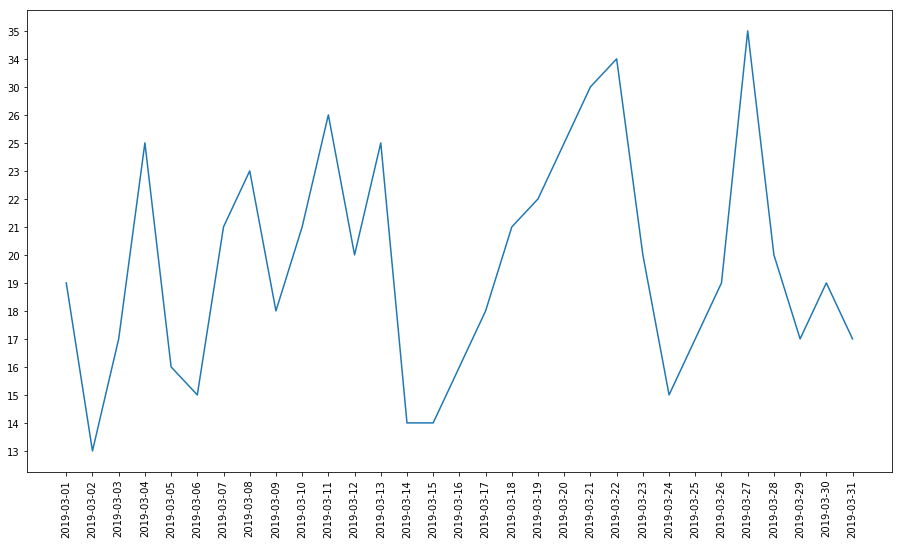

In [238]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 8.5)
plt.plot(extract_Bathroom['date'], extract_Bathroom['count'])

plt.xticks(rotation='vertical')
plt.savefig('Bathroom.png')
plt.show()

### illuminance data analysis

In [239]:
week_il0=df[df['weekday']==0]
week_il1=df[df['weekday']==1]
week_il2=df[df['weekday']==2]
week_il3=df[df['weekday']==3]
week_il4=df[df['weekday']==4]
week_il5=df[df['weekday']==5]
week_il6=df[df['weekday']==6]

### Week 1 illuminance uses

In [255]:
# il0=week_il0[week_il0['function_name'].str.contains("Bed Lamp Power")]
il1=week_il1[week_il1['function_name'].str.contains("Lounge Illuminance")]
il2=week_il1[week_il1['function_name'].str.contains("Kitchen Illuminance")]
il3=week_il3[week_il1['function_name'].str.contains("Bathroom Illuminance")]
# il4=week_il4[week_il4['function_name'].str.contains("illuminance")]
# il5=week_il5[week_il5['function_name'].str.contains("illuminance")]
# il6=week_il6[week_il6['function_name'].str.contains("illuminance")]

In [258]:
#il_week0=il0.set_index('date').groupby('function_name')["value"].resample("D").count() 
il_week1=il1.set_index('date').groupby('function_name')["value"].resample("D").count()
il_week2=il2.set_index('date').groupby('function_name')["value"].resample("D").count()
il_week3=il3.set_index('date').groupby('function_name')["value"].resample("D").count()
#il_week4=il4.set_index('date').groupby('function_name')["value"].resample("D").count()
# il_week5=il5.set_index('date').groupby('function_name')["value"].resample("D").count()
# il_week6=il6.set_index('date').groupby('function_name')["value"].resample("D").count()

In [261]:
# il_week0.to_csv('aram1.csv')
# col_il0=["function_name", "timeOfData", "count"]
# csv_il= pd.read_csv("aram1.csv",names=col_il0)
# df41_il=csv_il.drop(csv_il.index[0])


il_week1.to_csv('bram1.csv')
il_door1=["function_name", "timeOfData", "count"]
csv_il1= pd.read_csv("bram1.csv",names=il_door1)
df42_il=csv_il1.drop(csv_il1.index[0])

il_week2.to_csv('cram1.csv')
col_il2=["function_name", "timeOfData", "count"]
csv_il2= pd.read_csv("cram1.csv",names=col_il2)
df43_il=csv_il2.drop(csv_il2.index[0])

il_week3.to_csv('dram1.csv')
col_il3=["function_name", "timeOfData", "count"]
csv_il3= pd.read_csv("dram1.csv",names=col_il3)
df44_il=csv_il3.drop(csv_il3.index[0])


# il_week4.to_csv('eram1.csv')
# col_il4=["function_name", "timeOfData", "count"]
# csv_il4= pd.read_csv("eram1.csv",names=col_il4)
# df45_il=csv_il4.drop(csv_il4.index[0])

# il_week5.to_csv('fram1.csv')
# col_il5=["function_name", "timeOfData", "count"]
# csv_il5= pd.read_csv("fram1.csv",names=col_il5)
# df46_il=csv_il5.drop(csv_il5.index[0])

# il_week6.to_csv('gram1.csv')
# col_il6=["function_name", "timeOfData", "count"]
# csv_il6= pd.read_csv("gram1.csv",names=col_il6)
# df47_il=csv_il6.drop(csv_il6.index[0])

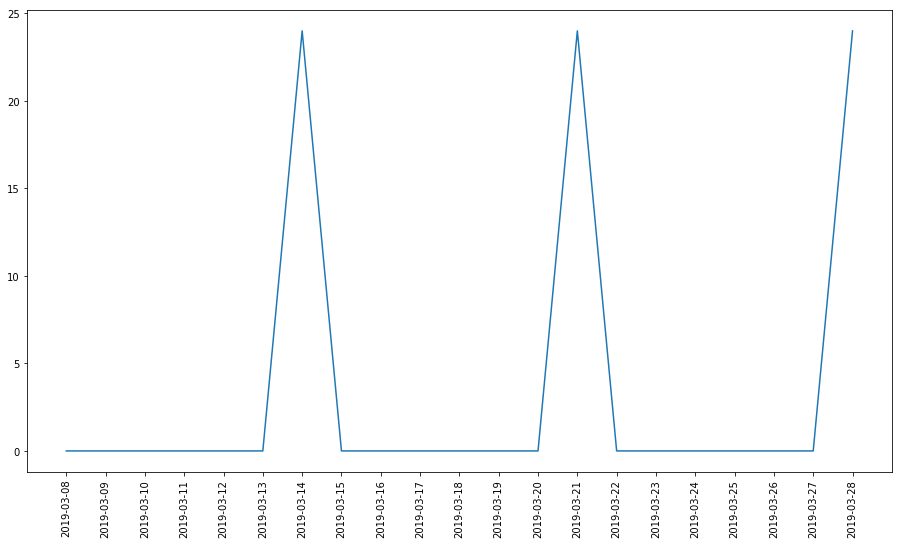

In [266]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 8.5)
plt.plot(df44_il['timeOfData'], df44_il['count'])

plt.xticks(rotation='vertical')
plt.savefig('Bathroom.png')
plt.show()

In [267]:
df['time_epoch'] = (df['timeOfData'].astype(np.int64)/100000000000).astype(np.int64)


In [197]:

outliers_fraction = 0.01
# Take useful feature and standardize them
data = df[['value', 'hours', 'weekday', 'time_epoch']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)


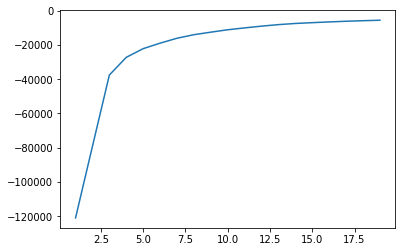

In [198]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()


In [199]:
df['cluster'] = kmeans[7].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

3    12867
1    11065
6     9885
5     9337
4     8660
0     8161
7      409
2      149
Name: cluster, dtype: int64

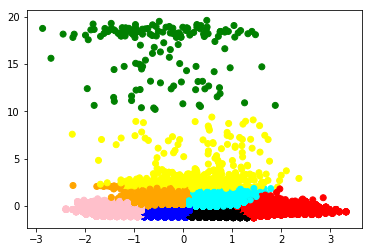

In [200]:
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [201]:
# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [202]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)


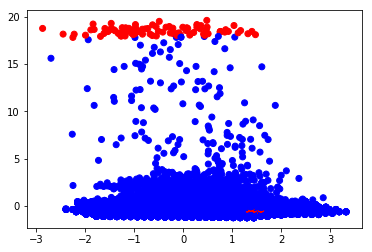

In [203]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()


In [204]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df['anomaly25'] = pd.Series(model.predict(data))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())

0    59923
1      610
Name: anomaly25, dtype: int64


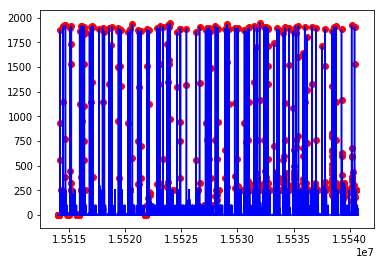

In [206]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly25'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()


In [207]:
                                
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
# train one class SVM 
model =  OneClassSVM(nu=0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
data = pd.DataFrame(np_scaled)
model.fit(data)
# add the data to the main  
df['anomaly26'] = pd.Series(model.predict(data))
df['anomaly26'] = df['anomaly26'].map( {1: 0, -1: 1} )
print(df['anomaly26'].value_counts())

                                                                                                      

0    59945
1      588
Name: anomaly26, dtype: int64


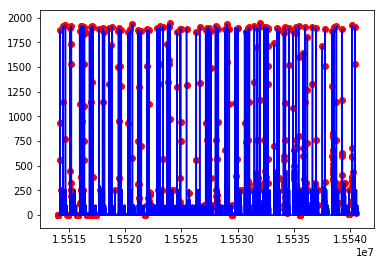

In [208]:
fig, ax = plt.subplots()

a = df.loc[df['anomaly26'] == 1, ['time_epoch', 'value']] #anomaly

ax.plot(df['time_epoch'], df['value'], color='blue')
ax.scatter(a['time_epoch'],a['value'], color='red')
plt.show()
